### Case1

#### Analytical

In [7]:
import numpy as np
import matplotlib.pyplot as plt



C:\Users\xh1224\AppData\Local\Temp\ipykernel_28044\3567060406.py:16: RuntimeWarning: divide by zero encountered in divide
  f1 = 1 / (1+(miu1*kr2)/(miu2*kr1))


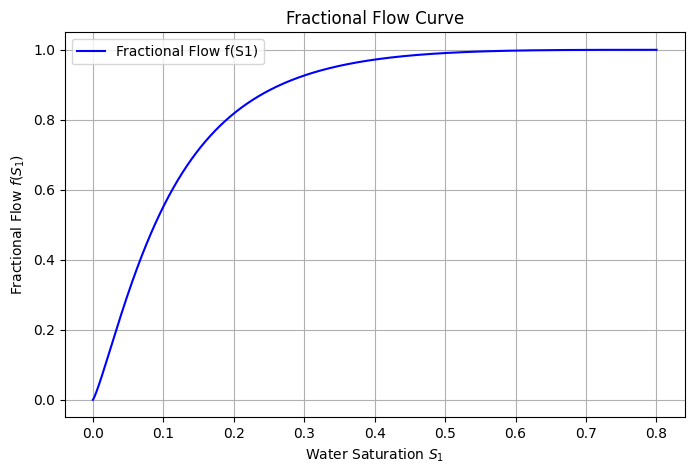

In [ ]:
S_1i = 0
S_2r =0.2
S_w = 1 - S_2r
S_1 = np.linspace(S_1i,S_w,1000)
kr1_max = 1
kr2_max = 1
a = 1.2
b = 3
miu1 =0.1
miu2 = 1

def f(x):
    Se = (S_1-S_1i)/(1-S_2r - S_1i)
    kr1 = kr1_max*Se**a
    kr2 = kr2_max*(1-Se)**b
    f1 = 1 / (1+(miu1*kr2)/(miu2*kr1))
    return f1

# Calculate f for each S_1
f_values = f(S_1)



# Plotting
plt.figure(figsize=(8, 5))
plt.plot(S_1, f_values, label='Fractional Flow f(S1)', color='blue')
plt.xlabel('Water Saturation $S_1$')
plt.ylabel('Fractional Flow $f(S_1)$')
plt.title('Fractional Flow Curve')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\xh1224\AppData\Local\Temp\ipykernel_28044\1849789665.py:22: RuntimeWarning: divide by zero encountered in divide
  f1 = 1 / (1 + (miu1 * kr2) / (miu2 * kr1))
C:\Users\xh1224\AppData\Local\Temp\ipykernel_28044\1849789665.py:29: RuntimeWarning: invalid value encountered in divide
  f_prime_simple = f_values / (S_1 - S_1i)


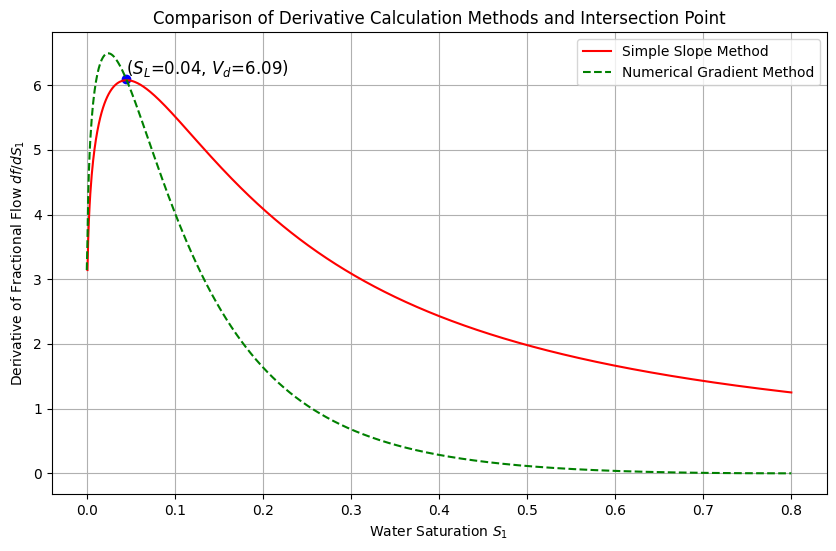

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
S_1i = 0
S_2r = 0.2
S_w = 1 - S_2r
S_1 = np.linspace(S_1i, S_w, 1000)
kr1_max = 1
kr2_max = 1
a = 1.2
b = 3
miu1 = 0.1
miu2 = 1
delta_S = S_1[1] - S_1[0]  # small delta for numerical differentiation

# Function definition
def f(S_1):
    Se = (S_1 - S_1i) / (1 - S_2r - S_1i)
    kr1 = kr1_max * Se ** a
    kr2 = kr2_max * (1 - Se) ** b
    f1 = 1 / (1 + (miu1 * kr2) / (miu2 * kr1))
    return f1

# Calculate f for each S_1
f_values = f(S_1)

# Method 1: Simple Slope
f_prime_simple = f_values / (S_1 - S_1i)
f_prime_simple[S_1 == S_1i] = np.nan  # avoid division by zero at S_1i

# Method 2: Numerical Gradient
f_prime_numerical = np.gradient(f_values, S_1)

# Finding a non-zero intersection
crossing_indexes = np.where(np.diff(np.sign(f_prime_simple - f_prime_numerical)))[0]
if len(crossing_indexes) > 0:
    # Find the first crossing that isn't at the starting point (ignoring initial NaNs)
    for idx in crossing_indexes:
        if idx != 0 and not np.isnan(f_prime_simple[idx]):
            V_d = f_prime_numerical[idx]  # Assuming this is the desired 'velocity'
            S_L = S_1[idx]  # Saturation at the intersection
            break
else:
    V_d = None
    S_L = None

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_1, f_prime_simple, label='Simple Slope Method', color='red')
plt.plot(S_1, f_prime_numerical, label='Numerical Gradient Method', color='green', linestyle='--')
if V_d is not None and S_L is not None:
    plt.scatter([S_L], [V_d], color='blue')  # Intersection point
    plt.text(S_L, V_d, f'($S_L$={S_L:.2f}, $V_d$={V_d:.2f})', fontsize=12, verticalalignment='bottom')

plt.xlabel('Water Saturation $S_1$')
plt.ylabel('Derivative of Fractional Flow $df/dS_1$')
plt.title('Comparison of Derivative Calculation Methods and Intersection Point')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\xh1224\AppData\Local\Temp\ipykernel_28044\875992941.py:23: RuntimeWarning: divide by zero encountered in divide
  f1 = 1 / (1 + (miu1 * kr2) / (miu2 * kr1))


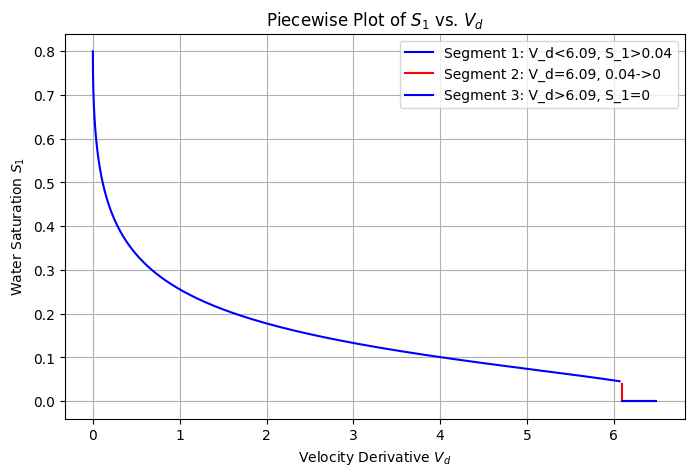

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 参数设置
S_1i = 0
S_2r = 0.2
S_w = 1 - S_2r
S_1 = np.linspace(S_1i, S_w, 1000)

kr1_max = 1
kr2_max = 1
a = 1.2
b = 3
miu1 = 0.1
miu2 = 1

# 2. 定义函数 f(S_1)
def f(S_1):
    # 有效饱和度
    Se = (S_1 - S_1i) / (1 - S_2r - S_1i)
    kr1 = kr1_max * Se ** a
    kr2 = kr2_max * (1 - Se) ** b
    f1 = 1 / (1 + (miu1 * kr2) / (miu2 * kr1))
    return f1

# 3. 计算 f(S_1) 以及它对 S_1 的数值导数 V_d
f_values = f(S_1)
V_d = np.gradient(f_values, S_1)  # 即 df/dS_1

# --------------------------------------------------------------------
# 根据需求拆分为三段：
#   第一段: V_d < 6.09，且 S_1 > 0.04
#   第二段: V = 6.09，S_1 从 0.04 到 0 (一条垂直线)
#   第三段: V > 6.09，S_1 = 0 (一条水平线)
# --------------------------------------------------------------------

# （可选）如果希望作图时按照 V_d 从小到大排列，则可以先排序
# sort_idx = np.argsort(V_d)
# V_d_sorted = V_d[sort_idx]
# S_1_sorted = S_1[sort_idx]
# 然后对 V_d_sorted, S_1_sorted 做下面的分段。此示例中直接用原顺序。

# 1) 第一段掩码
mask1 = (V_d <= 6.09) & (S_1 > 0.04)
V_d_seg1 = V_d[mask1]
S_1_seg1 = S_1[mask1]

# 2) 第二段：垂直线段 (6.09, 0.04) 到 (6.09, 0.0)
V_d_seg2 = [6.09, 6.09]
S_1_seg2 = [0.04, 0.0]

# 3) 第三段：V_d > 6.09, S_1 = 0
mask3 = (V_d >= 6.09)
V_d_seg3 = V_d[mask3]
S_1_seg3 = np.zeros_like(V_d_seg3)

# 4. 绘图
plt.figure(figsize=(8, 5))

# 第一段
plt.plot(V_d_seg1, S_1_seg1, 'b-', label='Segment 1: V_d<6.09, S_1>0.04')
# 第二段（垂直线）
plt.plot(V_d_seg2, S_1_seg2, 'r-', label='Segment 2: V_d=6.09, 0.04->0')
# 第三段（水平线）
plt.plot(V_d_seg3, S_1_seg3, 'b-', label='Segment 3: V_d>6.09, S_1=0')

plt.xlabel('Velocity Derivative $V_d$')
plt.ylabel('Water Saturation $S_1$')
plt.title('Piecewise Plot of $S_1$ vs. $V_d$')
plt.legend()
plt.grid(True)
plt.show()


### Case1 Numerical

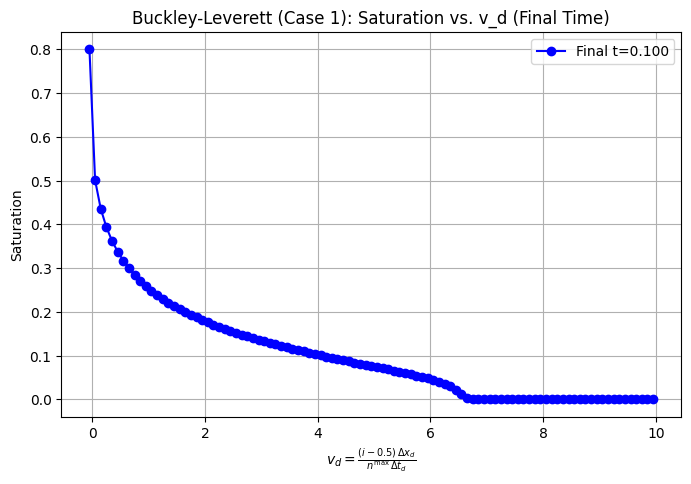

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# =============================
# 1. 给定参数 (以Case 1为例)
# =============================
mu1   = 0.1     # mPa·s (非润湿相, CO2)
mu2   = 1.0     # mPa·s (润湿相, Water)
kr1_max = 1.0
kr2_max = 1.0
a     = 1.2
b     = 3.0
S1i   = 0.0     # irreducible saturation
S2r   = 0.2     # residual saturation

# 网格与时间步
delta_xd = 0.01   # 已知, 空间步长
Nx       = 101    # => (Nx-1)*delta_xd = 1.0
delta_td = 0.001  # 已知, 时间步长
n_max    = 100    # 你可以根据需要选多少步, 使 n_max*delta_td 覆盖足够长的时间

# =============================
# 2. 定义 f(S) 函数(分数流)
# =============================
def fractional_flow(S):
    """
    f(S) = 1 / [ 1 + (mu1 * kr2)/(mu2 * kr1) ]
    其中:
      kr1 = kr1_max * (Se^a)
      kr2 = kr2_max * ((1 - Se)^b)
      Se  = (S - S1i)/(1 - S2r - S1i)
    """
    eps = 1e-14
    Se  = (S - S1i)/((1 - S2r - S1i) + eps)
    Se  = np.clip(Se, 0, 1)  # 限制Se在[0,1]

    kr1 = kr1_max*(Se**a)
    kr2 = kr2_max*((1 - Se)**b)

    kr1_safe = np.where(kr1==0, eps, kr1) 
    f_val = 1.0/(1.0 + (mu1*kr2)/(mu2*kr1_safe))
    return f_val

# =============================
# 3. 初始条件 (t=0)
# =============================
#   - S(0)= 1-S2r=0.8 (在 i=0 处) 
#   - 其余 i=1..Nx-1 => S=0
S = np.zeros(Nx)
S[0] = 1.0 - S2r  # 0.8

# =============================
# 4. 两层循环：外层为时间 n, 内层为空间 i
# =============================
for n in range(n_max):
    S_new = S.copy()
    # 先在同一时间上，从 i=1..Nx-1 更新
    for i in range(1, Nx):
        f_i   = fractional_flow(S[i])
        f_im1 = fractional_flow(S[i-1])
        # 显式一次上风格式
        S_new[i] = S[i] - (delta_td/delta_xd)*(f_i - f_im1)
    
    # 左边界保持0.8 (若题意如此)
    S_new[0] = 1.0 - S2r
    S = S_new

# =============================
# 5. 构造 v_d 并作图
#    v_d(i) = ((i - 0.5)* delta_xd)/(n_max * delta_td)
# =============================
v_d_array = np.zeros(Nx)
for i in range(Nx):
    v_d_array[i] = ((i - 0.5)*delta_xd)/(n_max*delta_td)

# 画图
plt.figure(figsize=(8,5))
plt.plot(v_d_array, S, 'b-o', label=f'Final t={n_max*delta_td:.3f}')
plt.xlabel(r'$v_d = \frac{(i - 0.5)\,\Delta x_d}{n^{\max}\,\Delta t_d}$')
plt.ylabel('Saturation')
plt.title('Buckley-Leverett (Case 1): Saturation vs. v_d (Final Time)')
plt.grid(True)
plt.legend()
plt.show()


#### Combination case1

C:\Users\xh1224\AppData\Local\Temp\ipykernel_28044\1153615783.py:22: RuntimeWarning: divide by zero encountered in divide
  return 1/(1 + (miu1*kr2)/(miu2*kr1))


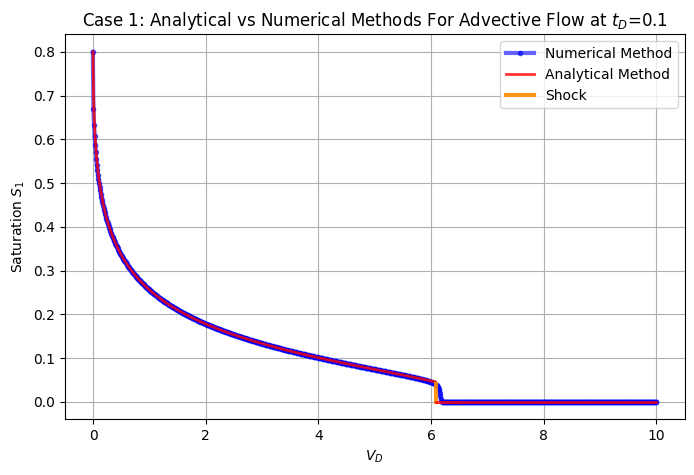

In [275]:
import numpy as np
import matplotlib.pyplot as plt

# ========== 第一段：解析方法 (Analytical) ==========
# 1. 参数设置
S_1i = 0
S_2r = 0.2
S_w = 1 - S_2r
S_1 = np.linspace(S_1i, S_w, 1000)

kr1_max = 1
kr2_max = 1
a = 1.2
b = 3
miu1 = 0.1
miu2 = 1

def f_ana(S_1):
    Se = (S_1 - S_1i)/(1 - S_2r - S_1i)
    kr1 = kr1_max*(Se**a)
    kr2 = kr2_max*((1 - Se)**b)
    return 1/(1 + (miu1*kr2)/(miu2*kr1))

f_values = f_ana(S_1)
V_d_ana  = np.gradient(f_values, S_1)   # df/dS_1

# 分段1: V_d<6.09 & S_1>0.04
mask1 = (V_d_ana <= 6.09) & (S_1 > 0.04)
V_d_seg1 = V_d_ana[mask1]
S_1_seg1 = S_1[mask1]

# 分段2: 一条“Shock”垂直线 (6.09, 0.04)->(6.09, 0.0)
V_d_seg2 = [6.09, 6.09]
S_1_seg2 = [0.04, 0.0]

# 分段3(原始): V_d >= 6.09 => S_1=0
mask3 = (V_d_ana >= 6.09)
V_d_seg3 = V_d_ana[mask3]
S_1_seg3 = np.zeros_like(V_d_seg3)

# ----- 额外拓展: 从 6.09 到 10, S_1=0 -----
V_d_extend = np.linspace(6.09, 10, 50)
S_1_extend = np.zeros_like(V_d_extend)

# 把原先的第三段与新扩展段拼接
V_d_seg3_extended = np.concatenate([V_d_seg3, V_d_extend])
S_1_seg3_extended = np.concatenate([S_1_seg3, S_1_extend])


# ========== 第二段：数值方法 (Numerical) ==========
mu1_num   = 0.1
mu2_num   = 1.0
a_num     = 1.2
b_num     = 3.0
S1i_num   = 0.0
S2r_num   = 0.2
kr1_num_max = 1.0
kr2_num_max = 1.0

delta_xd = 0.001
Nx       = 1001
delta_td = 0.0001
n_max    = 1000

def fractional_flow_num(S):
    eps = 1e-14
    Se  = (S - S1i_num)/((1 - S2r_num - S1i_num) + eps)
    Se  = np.clip(Se,0,1)
    kr1 = kr1_num_max*(Se**a_num)
    kr2 = kr2_num_max*((1 - Se)**b_num)
    kr1_safe = np.where(kr1==0, eps, kr1)
    return 1.0/(1.0 + (mu1_num*kr2)/(mu2_num*kr1_safe))

# 初始条件
S_num = np.zeros(Nx)
S_num[0] = 1 - S2r_num  # = 0.8

# 显式两层循环
for n in range(n_max):
    S_new = S_num.copy()
    for i in range(1, Nx):
        fi   = fractional_flow_num(S_num[i])
        fim1 = fractional_flow_num(S_num[i-1])
        S_new[i] = S_num[i] - (delta_td/delta_xd)*(fi - fim1)
    S_new[0] = 0.8
    S_num = S_new

# 构造 v_d(i) = ((i - 0.5)*delta_xd)/(n_max*delta_td)
v_d_num = np.zeros(Nx)
for i in range(Nx):
    v_d_num[i] = ((i - 0.5)*delta_xd)/(n_max*delta_td)

# ========== 同一张图 ==========

plt.figure(figsize=(8,5))

# (2) 数值方法
plt.plot(v_d_num, S_num, marker='.', color='blue',
        linewidth=3, alpha=0.6,
         label='Numerical Method')

# (1) 解析方法
# 分段1
plt.plot(V_d_seg1, S_1_seg1, color='red',
         linestyle='-', linewidth=2, alpha=0.8,
         label='Analytical Method')

# Shock
plt.plot(V_d_seg2, S_1_seg2, color='darkorange',
         linestyle='-', linewidth=3, alpha=0.9,
         label='Shock')

# 第三段(拓展到10)
plt.plot(V_d_seg3_extended, S_1_seg3_extended, color='red',
         linestyle='-', linewidth=2, alpha=0.8)

# 轴标签和其他美化
plt.xlabel('$V_D$')
plt.ylabel('Saturation $S_1$')
plt.title('Case 1: Analytical vs Numerical Methods For Advective Flow at $t_D$=0.1')
plt.grid(True)
plt.legend()
plt.show()


#### Case 2 analytical

C:\Users\xh1224\AppData\Local\Temp\ipykernel_28044\423999456.py:16: RuntimeWarning: divide by zero encountered in divide
  f1 = 1 / (1+(miu1_case2*kr2)/(miu2_case2*kr1))


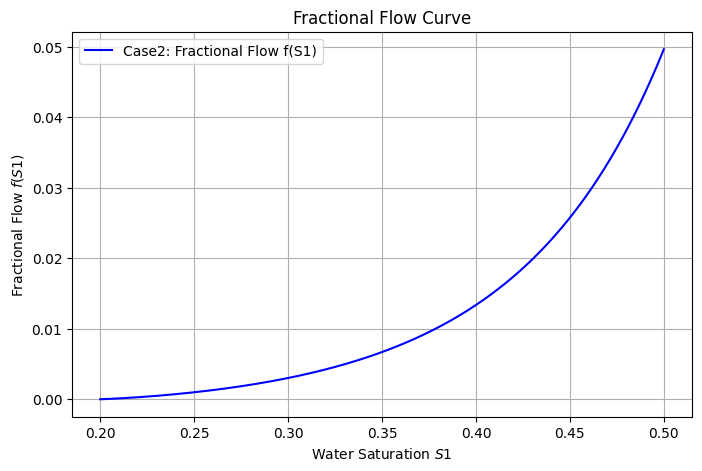

In [188]:
S_1i_case2 = 0.2
S_2r_case2 =0.5
S_w_case2 = 1 - S_2r_case2
S_1_case2 = np.linspace(S_1i_case2,S_w_case2,1000)
kr1_max_case2 = 0.15
kr2_max_case2 = 1
a_case2 = 4
b_case2 = 1.5
miu1_case2 = 1
miu2_case2 = 0.1

def f_case2(x):
    Se = (S_1_case2-S_1i_case2)/(1-S_2r - S_1i_case2)
    kr1 = kr1_max_case2*Se**a
    kr2 = kr2_max_case2*(1-Se)**b
    f1 = 1 / (1+(miu1_case2*kr2)/(miu2_case2*kr1))
    return f1

# Calculate f for each S_1_case2
f_values_case2 = f_case2(S_1_case2)



# Plotting
plt.figure(figsize=(8, 5))
plt.plot(S_1_case2, f_values_case2, label='Case2: Fractional Flow f(S1)', color='blue')
plt.xlabel('Water Saturation $S1$')
plt.ylabel('Fractional Flow $f(S1)$')
plt.title('Fractional Flow Curve')
plt.legend()
plt.grid(True)
plt.show()



##### f derivative

Second Intersection found at S_L=0.499970, V_d=3.333738


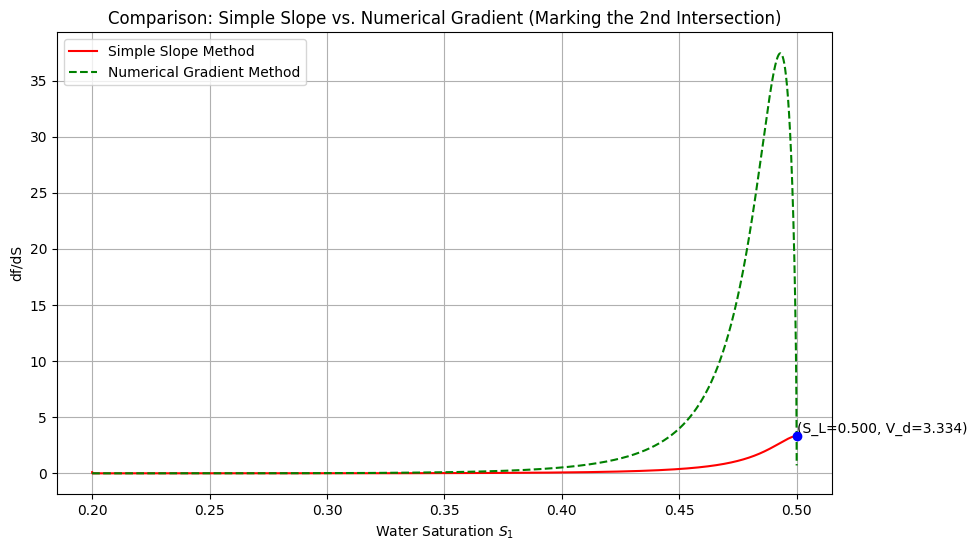

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# 给定参数
S_1i_case2 = 0.2
S_2r_case2 = 0.5  # 这里的值若与物理意义相关，可以继续保留
# 这行改为 1.0，以便让 S_1 从 0.2 一直取到 1.0
S_w_case2 = 0.5  

# 用 linspace 从 0.2 到 1.0 生成 1000000 个点
S_1_case2 = np.linspace(S_1i_case2, S_w_case2, 100000)

kr1_max_case2 = 0.15
kr2_max_case2 = 1
a_case2 = 4
b_case2 = 1.5
miu1_case2 = 1
miu2_case2 = 0.1

# 定义 Fractional Flow 函数
def f_case2(S_1):
    """
    Fractional Flow:
    f(S_1) = 1 / [ 1 + ( miu1 * kr2 ) / ( miu2 * kr1 ) ]
    其中:
        kr1 = kr1_max * Se^a
        kr2 = kr2_max * (1 - Se)^b
        Se  = (S_1 - S_1i_case2) / (1 - S_2r_case2 - S_1i_case2)
    """
    Se = (S_1 - S_1i_case2) / (1 - S_2r_case2 - S_1i_case2)
    kr1 = kr1_max_case2 * (Se ** a_case2)
    kr2 = kr2_max_case2 * ((1 - Se) ** b_case2)
    
    # 避免分母=0，简单加 epsilon
    epsilon = 1e-14
    kr1_safe = np.where(kr1 == 0, epsilon, kr1)
    
    f_val = 1.0 / (1.0 + (miu1_case2 * kr2) / (miu2_case2 * kr1_safe))
    return f_val

# ========== 1. 计算 f(S1) ==========
f_values_case2 = f_case2(S_1_case2)

# ========== 2. Simple Slope ==========
epsilon = 1e-14
f_prime_simple_case2 = f_values_case2 / ((S_1_case2 - S_1i_case2) + epsilon)

# ========== 3. Numerical Gradient ==========
f_prime_numerical_case2 = np.gradient(f_values_case2, S_1_case2)

# ========== 4. 找交点 ==========
diff_array = f_prime_simple_case2 - f_prime_numerical_case2
sign_diff = np.sign(diff_array)

crossing_indexes = np.where(np.diff(sign_diff) != 0)[0]
# 筛掉在边界的点
valid_crossings = [idx for idx in crossing_indexes if 0 < idx < len(S_1_case2)]

# 准备存储“第二个交点”的坐标
V_d_intersect_2 = None
S_L_intersect_2 = None

if len(valid_crossings) < 2:
    print("没有找到至少两个交点，无法标注第二个交点。")
else:
    # 取第二个交点对应的索引
    idx_2 = valid_crossings[1]
    V_d_intersect_2 = f_prime_numerical_case2[idx_2]
    S_L_intersect_2 = S_1_case2[idx_2]
    print(f"Second Intersection found at S_L={S_L_intersect_2:.6f}, V_d={V_d_intersect_2:.6f}")

# --------------------- 绘图 ---------------------
plt.figure(figsize=(10, 6))

# 分别画出 Simple Slope 和 Numerical Gradient
plt.plot(S_1_case2, f_prime_simple_case2, label='Simple Slope Method', color='red')
plt.plot(S_1_case2, f_prime_numerical_case2, label='Numerical Gradient Method', color='green', linestyle='--')

# 如果找到了第二个交点，就在图中标出
if (V_d_intersect_2 is not None) and (S_L_intersect_2 is not None):
    # 用 scatter 标出交点
    plt.scatter([S_L_intersect_2], [V_d_intersect_2], color='blue', zorder=5)
    # 显示坐标，亦可改用 annotate
    plt.text(S_L_intersect_2, V_d_intersect_2,
             f'(S_L={S_L_intersect_2:.3f}, V_d={V_d_intersect_2:.3f})',
             fontsize=10, verticalalignment='bottom')

plt.xlabel('Water Saturation $S_1$')
plt.ylabel('df/dS')
plt.title('Comparison: Simple Slope vs. Numerical Gradient (Marking the 2nd Intersection)')
plt.legend()
plt.grid(True)
plt.show()


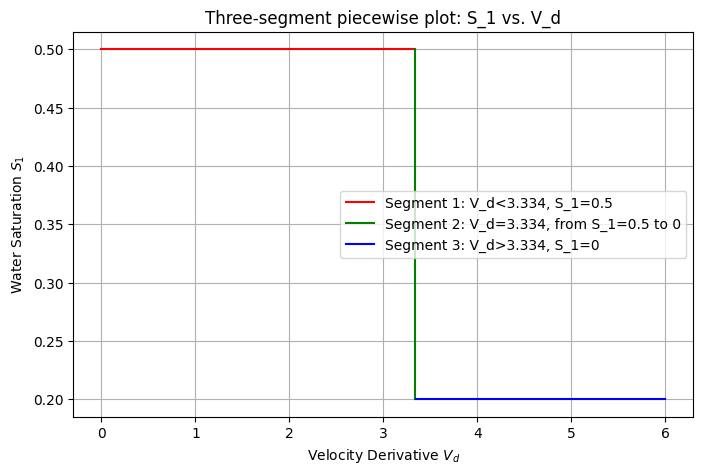

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# 为了演示分段，我们先假设 V_d 在 [0, 6] 范围内
V_d_range = np.linspace(0, 6, 200)  # 200个点，从0到6

# 1) 第一段: V_d < 3.334, S_1 = 0.5
mask1 = V_d_range < 3.334
V_d_seg1 = V_d_range[mask1]
S_1_seg1 = np.full_like(V_d_seg1, 0.5)

# 2) 第二段: V_d = 3.334, S_1 从 0.5 到 0 (一条垂直线)
V_d_seg2 = [3.334, 3.334]
S_1_seg2 = [0.5, 0.2]

# 3) 第三段: V_d > 3.334, S_1 = 0
mask3 = V_d_range > 3.334
V_d_seg3 = V_d_range[mask3]
S_1_seg3 = 0.2 * np.ones_like(V_d_seg3)

# 画图
plt.figure(figsize=(8, 5))

# 绘制第一段(红色实线)
plt.plot(V_d_seg1, S_1_seg1, 'r-', label='Segment 1: V_d<3.334, S_1=0.5')

# 绘制第二段(绿色虚线 - 垂直线)
plt.plot(V_d_seg2, S_1_seg2, 'g-', label='Segment 2: V_d=3.334, from S_1=0.5 to 0')

# 绘制第三段(蓝色实线)
plt.plot(V_d_seg3, S_1_seg3, 'b-', label='Segment 3: V_d>3.334, S_1=0')

plt.xlabel('Velocity Derivative $V_d$')
plt.ylabel('Water Saturation $S_1$')
plt.title('Three-segment piecewise plot: S_1 vs. V_d')
plt.grid(True)
plt.legend()
plt.show()


#### case2 Numerical

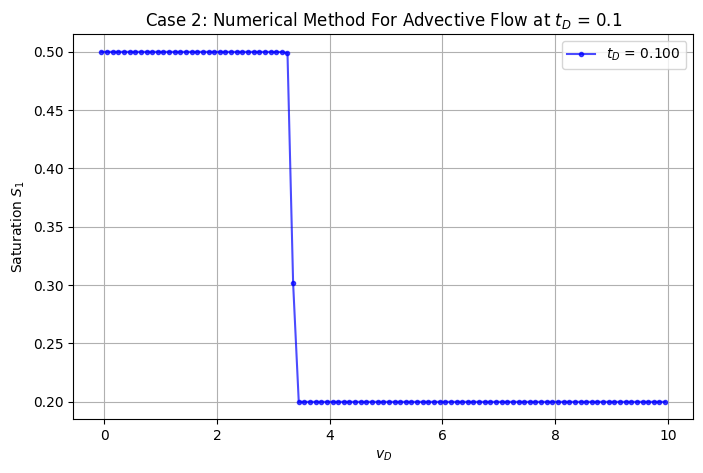

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# =============================
# 1. 给定参数 (Case 2)
# =============================
# Phase 1: Water; Phase 2: Hydrogen
# 见表格：mu1=1.0, mu2=0.1, kr1max=0.15, kr2max=1.0, a=4, b=1.5
mu1       = 1.0       # mPa·s (水相)
mu2       = 0.1       # mPa·s (氢气)
kr1_max   = 0.15
kr2_max   = 1.0
a         = 4.0
b         = 1.5
S1i       = 0.2       # irreducible saturation
S2r       = 0.5       # residual saturation

# 网格与时间步信息
delta_xd  = 0.01    # 空间步长
Nx        = 101     # 网格数(0~Nx-1)
delta_td  = 0.0001   # 时间步长
n_max     = 1000     # 时间步数

# =============================
# 2. 定义分数流函数 f(S)
# =============================
def fractional_flow(S):
    """
    f(S) = 1 / [1 + (mu1 * kr2)/(mu2 * kr1)]
    其中:
      kr1 = kr1_max * Se^a
      kr2 = kr2_max * (1 - Se)^b
      Se  = (S - S1i)/(1 - S2r - S1i)
    """
    eps = 1e-14
    # 有效饱和度 Se
    Se  = (S - S1i) / ((1 - S2r - S1i) + eps)
    Se  = np.clip(Se, 0, 1)  # 确保在 [0,1]

    kr1 = kr1_max * (Se ** a)
    kr2 = kr2_max * ((1 - Se) ** b)

    kr1_safe = np.where(kr1==0, eps, kr1)
    f_val = 1.0 / (1.0 + (mu1 * kr2)/(mu2 * kr1_safe))
    return f_val

# =============================
# 3. 初始条件
# =============================
# i=0 处: S=1 - S2r=0.5
# 其余 i=1..Nx-1: S=0.2
S = np.full(Nx, 0.2)   # 整个域先赋值0.2
S[0] = 1.0 - S2r       # 左边界=0.5

# =============================
# 4. 显式有限差分: 两层循环
# =============================
for n in range(n_max):
    S_new = S.copy()
    # 在同一时间层, 依次更新 i=1..Nx-1
    for i in range(1, Nx):
        f_i   = fractional_flow(S[i])
        f_im1 = fractional_flow(S[i-1])
        # 单向上风格式
        S_new[i] = S[i] - (delta_td / delta_xd)*(f_i - f_im1)
    
    # 左边界继续保持 S=0.5
    S_new[0] = 1.0 - S2r
    S = S_new

# =============================
# 5. 构造无量纲坐标 v_d(i) 并作图
# =============================
v_d_array = np.zeros(Nx)
for i in range(Nx):
    # v_d = ((i - 0.5)* delta_xd)/(n_max * delta_td)
    v_d_array[i] = ((i - 0.5)*delta_xd)/(n_max*delta_td)

plt.figure(figsize=(8,5))
plt.plot(v_d_array, S, 'bo-', markersize=3, alpha=0.7,
         label=f'$t_D$ = {n_max * delta_td:.3f}')
plt.xlabel(r'$v_D$')
plt.ylabel('Saturation $S_1$')
plt.title('Case 2: Numerical Method For Advective Flow at $t_D$ = 0.1')
plt.grid(True)
plt.legend()
plt.show()


#### Comparison case2

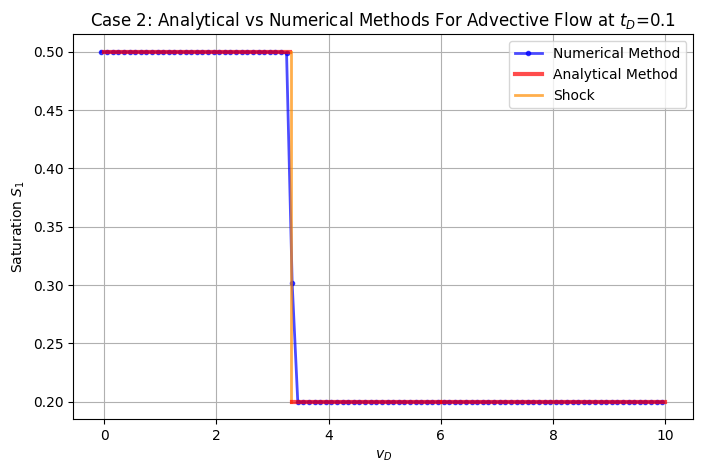

In [240]:
import numpy as np
import matplotlib.pyplot as plt

# ========== 第一部分：解析方法 (Analytical) ==========

# 为了把 V_d 拓展到 10，这里把上限改成 10
V_d_range = np.linspace(0, 10, 300)  # 300个点，从0到10

# 1) 第一段: V_d < 3.334, S_1=0.5
mask1 = (V_d_range < 3.334)
V_d_seg1 = V_d_range[mask1]
S_1_seg1 = np.full_like(V_d_seg1, 0.5)

# 2) 第二段: V_d=3.334, S_1从0.5到0.2 (垂直线)
V_d_seg2 = [3.334, 3.334]
S_1_seg2 = [0.5, 0.2]

# 3) 第三段: 3.334 < V_d <= 6, S_1=0.2
mask3 = (V_d_range > 3.334) & (V_d_range <= 6)
V_d_seg3 = V_d_range[mask3]
S_1_seg3 = np.full_like(V_d_seg3, 0.2)

# 4) 第四段: V_d > 6, S_1=0.2 (用红色突出)
mask4 = (V_d_range > 6)
V_d_seg4 = V_d_range[mask4]
S_1_seg4 = np.full_like(V_d_seg4, 0.2)


# ========== 第二部分：数值方法 (Numerical) ==========
mu1       = 1.0       # mPa·s (水相)
mu2       = 0.1       # mPa·s (氢气)
kr1_max   = 0.15
kr2_max   = 1.0
a         = 4.0
b         = 1.5
S1i       = 0.2
S2r       = 0.5

delta_xd  = 0.01    
Nx        = 101      
delta_td  = 0.0001   
n_max     = 1000     

def fractional_flow(S):
    """
    f(S) = 1 / [1 + (mu1 * kr2)/(mu2 * kr1)]
    """
    eps = 1e-14
    Se  = (S - S1i)/((1 - S2r - S1i) + eps)
    Se  = np.clip(Se, 0, 1)

    kr1 = kr1_max*(Se**a)
    kr2 = kr2_max*((1 - Se)**b)
    kr1_safe = np.where(kr1==0, eps, kr1)
    return 1.0/(1.0 + (mu1*kr2)/(mu2*kr1_safe))

# 初始条件: i=0处S=0.5, 其余=0.2
S_num = np.full(Nx, 0.2)
S_num[0] = 1.0 - S2r  # 0.5

# 显式有限差分
for n in range(n_max):
    S_new = S_num.copy()
    for i in range(1, Nx):
        fi   = fractional_flow(S_num[i])
        fim1 = fractional_flow(S_num[i-1])
        S_new[i] = S_num[i] - (delta_td/delta_xd)*(fi - fim1)
    # 左端保持 S=0.5
    S_new[0] = 1.0 - S2r
    S_num = S_new

# 构造无量纲坐标 v_d_num(i)
v_d_num = np.zeros(Nx)
for i in range(Nx):
    v_d_num[i] = ((i - 0.5)*delta_xd)/(n_max*delta_td)

# ========== 在同一张图中绘制 ==========
plt.figure(figsize=(8,5))

# --- 数值方法 ---
plt.plot(v_d_num, S_num, 'b.-', linewidth=2,
         alpha=0.7, label='Numerical Method')

# --- 解析方法 ---

# (1) 段1
plt.plot(V_d_seg1, S_1_seg1, color='red',
         linestyle='-', linewidth=3,
         alpha=0.7, label='Analytical Method')

# (2) Shock (垂直线)
plt.plot(V_d_seg2, S_1_seg2, color='darkorange',
         linestyle='-', linewidth=2,
         alpha=0.7, label='Shock')

# (3) 段3: 3.334 < V_d <= 6 => S=0.2
plt.plot(V_d_seg3, S_1_seg3, color='red',
         linestyle='-', linewidth=3,
         alpha=0.7)

# (4) 段4: V_d > 6 => S=0.2 (红色突出)
plt.plot(V_d_seg4, S_1_seg4, color='red',
         linestyle='-', linewidth=3,
         alpha=0.7)

# 坐标轴和图例
plt.xlabel(r'$v_D$')
plt.ylabel('Saturation $S_1$')
plt.title('Case 2: Analytical vs Numerical Methods For Advective Flow at $t_D$=0.1')
plt.grid(True)
plt.legend()
plt.show()


#### Analytical Case3

C:\Users\xh1224\AppData\Local\Temp\ipykernel_28044\2337625873.py:16: RuntimeWarning: divide by zero encountered in divide
  f1 = 1 / (1+(miu1_case3*kr2)/(miu2_case3*kr1))


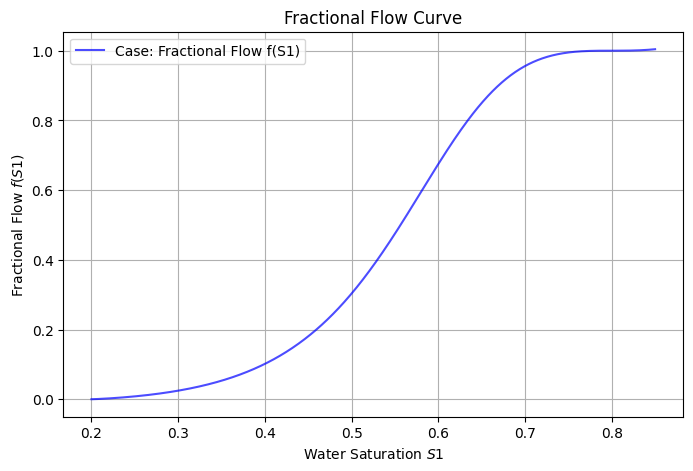

In [276]:
S_1i_case3 = 0.2
S_2r_case3 =0.15
S_w_case3 = 1 - S_2r_case3
S_1_case3 = np.linspace(S_1i_case3,S_w_case3,1000)
kr1_max_case3 = 0.4
kr2_max_case3 = 0.8
a_case3 = 8
b_case3 = 3
miu1_case3 = 0.4
miu2_case3 = 0.1

def f_case3(x):
    Se = (S_1_case3-S_1i_case3)/(1-S_2r - S_1i_case3)
    kr1 = kr1_max_case3*Se**a
    kr2 = kr2_max_case3*(1-Se)**b
    f1 = 1 / (1+(miu1_case3*kr2)/(miu2_case3*kr1))
    return f1

# Calculate f for each S_1_case3
f_values_case3 = f_case3(S_1_case3)



# Plotting
plt.figure(figsize=(8, 5))
plt.plot(S_1_case3, f_values_case3, label='Case: Fractional Flow f(S1)', color='blue',alpha=0.7)
plt.xlabel('Water Saturation $S1$')
plt.ylabel('Fractional Flow $f(S1)$')
plt.title('Fractional Flow Curve')
plt.legend()
plt.grid(True)
plt.show()



Intersection at S_L=0.774525, V_d=1.689166


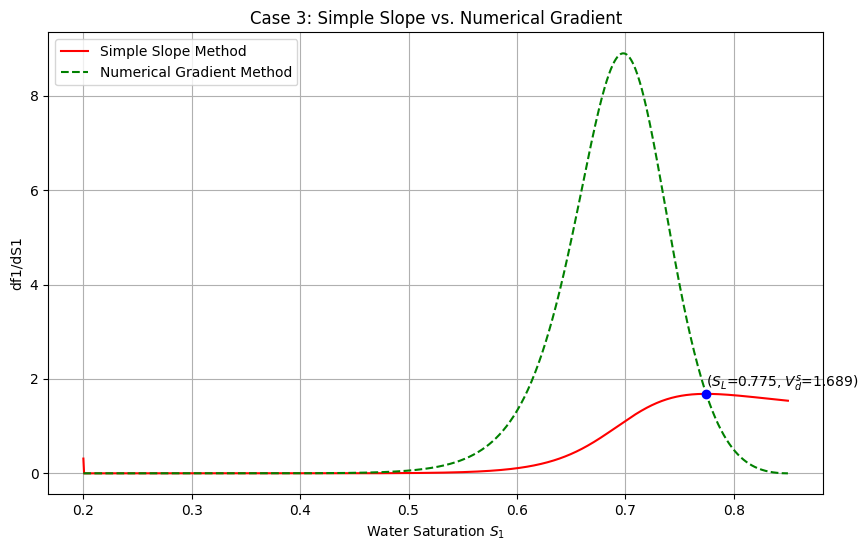

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# ------------ 1. 给定参数 ------------
S_1i_case3 = 0.2
S_2r_case3 = 0.15
S_w_case3 = 1 - S_2r_case3  # 0.85
S_1_case3 = np.linspace(S_1i_case3, S_w_case3, 1000)

kr1_max_case3 = 0.4
kr2_max_case3 = 0.8
a_case3 = 8
b_case3 = 3
miu1_case3 = 0.4
miu2_case3 = 0.1

# ------------ 2. 定义 f(S_1) ------------
def f_case3(S):
    """
    Fractional Flow f(S_1):
      f(S_1) = 1 / [ 1 + (miu1_case3 * kr2) / (miu2_case3 * kr1) ]
    其中:
      kr1 = kr1_max_case3 * (Se^a_case3)
      kr2 = kr2_max_case3 * ((1 - Se)^b_case3)
      Se  = (S_1 - S_1i_case3) / (1 - S_2r_case3 - S_1i_case3)
    """
    Se = (S - S_1i_case3) / (1 - S_2r_case3 - S_1i_case3)
    kr1 = kr1_max_case3 * (Se ** a_case3)
    kr2 = kr2_max_case3 * ((1 - Se) ** b_case3)

    # 避免 kr1=0 导致分母=0，这里简单加一个极小量
    epsilon = 1e-14
    kr1_safe = np.where(kr1 == 0, epsilon, kr1)

    f_val = 1.0 / (1.0 + (miu1_case3 * kr2) / (miu2_case3 * kr1_safe))
    return f_val

# ------------ 3. 计算 f_values_case3 ------------
f_values_case3 = f_case3(S_1_case3)

# ------------ 4. Simple Slope 与 Numerical Gradient ------------
epsilon = 1e-14
f_prime_simple_case3 = f_values_case3 / ((S_1_case3 - S_1i_case3) + epsilon)
f_prime_numerical_case3 = np.gradient(f_values_case3, S_1_case3)

# ------------ 5. 寻找交点 ------------
diff_array = f_prime_simple_case3 - f_prime_numerical_case3
sign_diff = np.sign(diff_array)
crossing_indexes = np.where(np.diff(sign_diff) != 0)[0]

# 筛掉在边界的无效索引
valid_crossings = [idx for idx in crossing_indexes if 0 < idx < (len(S_1_case3) - 1)]

if len(valid_crossings) < 2:
    print("没有找到至少两个有效交点，无法标注第二个交点。")
    second_intersect_Vd = None
    second_intersect_S = None
else:
    # 取第二个交点（若想第一个交点则用 valid_crossings[0]）
    idx2 = valid_crossings[1]
    second_intersect_Vd = f_prime_numerical_case3[idx2]
    second_intersect_S = S_1_case3[idx2]
    print(f'Intersection at S_L={second_intersect_S:.6f}, V_d={second_intersect_Vd:.6f}')

# ------------ 6. 绘图 ------------
plt.figure(figsize=(10, 6))

# Plot Simple Slope
plt.plot(S_1_case3, f_prime_simple_case3, label='Simple Slope Method', color='red')
# Plot Numerical Gradient
plt.plot(S_1_case3, f_prime_numerical_case3, label='Numerical Gradient Method', color='green', linestyle='--')

# 如果找到了第二个交点，则在图中标出
if (second_intersect_Vd is not None) and (second_intersect_S is not None):
    plt.scatter([second_intersect_S], [second_intersect_Vd], color='blue', zorder=5)
    plt.text(second_intersect_S, second_intersect_Vd,
             f'($S_L$={second_intersect_S:.3f}, $V_d^s$={second_intersect_Vd:.3f})',
             fontsize=10, verticalalignment='bottom')

plt.xlabel('Water Saturation $S_1$')
plt.ylabel('df1/dS1')
plt.title('Case 3: Simple Slope vs. Numerical Gradient')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\xh1224\AppData\Local\Temp\ipykernel_28044\1095254530.py:23: RuntimeWarning: divide by zero encountered in divide
  f1 = 1 / (1 + (miu1 * kr2) / (miu2 * kr1))


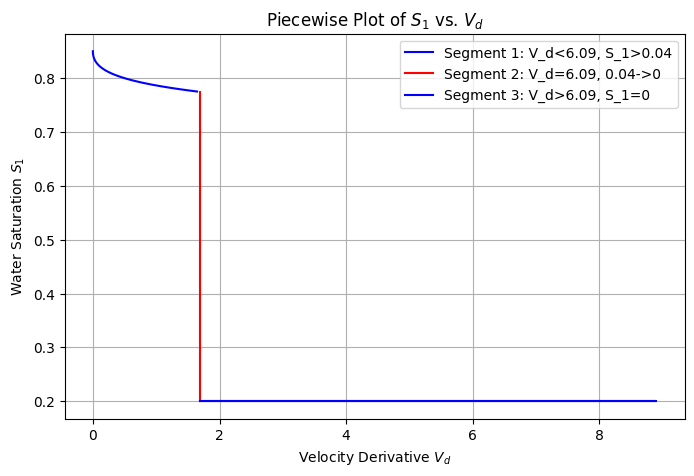

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 参数设置
S_1i = 0.2
S_2r = 0.15
S_w = 1 - S_2r
S_1 = np.linspace(S_1i, S_w, 1000)

kr1_max = 0.4
kr2_max = 0.8
a = 8
b = 3
miu1 = 0.4
miu2 = 0.1

# 2. 定义函数 f(S_1)
def f(S_1):
    # 有效饱和度
    Se = (S_1 - S_1i) / (1 - S_2r - S_1i)
    kr1 = kr1_max * Se ** a
    kr2 = kr2_max * (1 - Se) ** b
    f1 = 1 / (1 + (miu1 * kr2) / (miu2 * kr1))
    return f1

# 3. 计算 f(S_1) 以及它对 S_1 的数值导数 V_d
f_values = f(S_1)
V_d = np.gradient(f_values, S_1)  # 即 df/dS_1

# --------------------------------------------------------------------
# 根据需求拆分为三段：
#   第一段: V_d < 6.09，且 S_1 > 0.04
#   第二段: V = 6.09，S_1 从 0.04 到 0 (一条垂直线)
#   第三段: V > 6.09，S_1 = 0 (一条水平线)
# --------------------------------------------------------------------

# （可选）如果希望作图时按照 V_d 从小到大排列，则可以先排序
# sort_idx = np.argsort(V_d)
# V_d_sorted = V_d[sort_idx]
# S_1_sorted = S_1[sort_idx]
# 然后对 V_d_sorted, S_1_sorted 做下面的分段。此示例中直接用原顺序。



# 1) 第一段掩码
mask1 = (V_d <= 1.689) & (S_1 > 0.775)
V_d_seg1 = V_d[mask1]
S_1_seg1 = S_1[mask1]

# 2) 第二段：垂直线段 (6.09, 0.04) 到 (6.09, 0.0)
V_d_seg2 = [1.689, 1.689]
S_1_seg2 = [0.775, 0.2]

# 3) 第三段：V_d > 6.09, S_1 = 0
mask3 = (V_d >= 1.689)
V_d_seg3 = V_d[mask3]
S_1_seg3 = np.full_like(V_d_seg3, 0.2)

# 4. 绘图
plt.figure(figsize=(8, 5))

# 第一段
plt.plot(V_d_seg1, S_1_seg1, 'b-', label='Segment 1: V_d<6.09, S_1>0.04')
# 第二段（垂直线）
plt.plot(V_d_seg2, S_1_seg2, 'r-', label='Segment 2: V_d=6.09, 0.04->0')
# 第三段（水平线）
plt.plot(V_d_seg3, S_1_seg3, 'b-', label='Segment 3: V_d>6.09, S_1=0')

plt.xlabel('Velocity Derivative $V_d$')
plt.ylabel('Water Saturation $S_1$')
plt.title('Piecewise Plot of $S_1$ vs. $V_d$')
plt.legend()
plt.grid(True)
plt.show()


### Numerical Case3

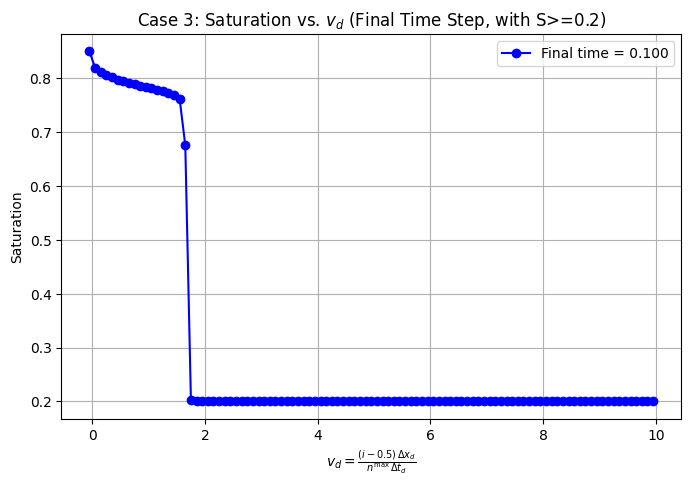

In [123]:
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------
# 1. 参数与网格设置 (Case 3)
#-----------------------------
mu1   = 0.4       # mPa·s (Phase 1: Water)
mu2   = 0.1       # mPa·s (Phase 2: CO2)
kr1_max = 0.4
kr2_max = 0.8
a     = 8.0
b     = 3.0
S1i   = 0.2
S2r   = 0.15

Lx    = 1.0
Nx    = 101
dx    = Lx/(Nx - 1)

dt    = 0.001
nt    = 100  # 时间步数(可根据稳定性和需求调整)

def fractional_flow(S):
    """
    f(S) = 1 / [1 + (mu1 * kr2)/(mu2 * kr1)]
    其中:
      kr1 = kr1_max * Se^a
      kr2 = kr2_max * (1 - Se)^b
      Se  = (S - S1i) / (1 - S2r - S1i)
    """
    eps = 1e-14
    # 有效饱和度 Se
    Se = (S - S1i) / ((1 - S2r - S1i) + eps)
    Se = np.clip(Se, 0, 1)  # 限制在[0,1]

    kr1 = kr1_max * (Se ** a)
    kr2 = kr2_max * ((1 - Se) ** b)

    kr1_safe = np.where(kr1 == 0, eps, kr1)
    f_val = 1.0 / (1.0 + (mu1 * kr2) / (mu2 * kr1_safe))
    return f_val

#-----------------------------
# 2. 初始/边界条件
#-----------------------------
# 左边界 S(0)=1-S2r =0.85
S = np.zeros(Nx)
S[0] = 1.0 - S2r  # =0.85

#-----------------------------
# 3. 时间推进(显式) + 截断处理
#-----------------------------
for n in range(nt):
    S_new = S.copy()
    for i in range(1, Nx):
        f_i   = fractional_flow(S[i])
        f_im1 = fractional_flow(S[i-1])
        S_new[i] = S[i] - (dt/dx)*(f_i - f_im1)
    
    # 下限截断(>=S1i=0.2), 上限截断(<=1-S2r=0.85)
    S_new = np.clip(S_new, S1i, 1.0 - S2r)

    # 左边界继续保持 S=0.85
    S_new[0] = 1.0 - S2r
    S = S_new  # 更新到下一个时间步

#-----------------------------
# 4. 最终时刻：按照 v_d = ((i - 0.5)* dx)/(nt * dt)
#-----------------------------
v_d_array = np.zeros(Nx)
for i in range(Nx):
    v_d_array[i] = ((i - 0.5) * dx) / (nt * dt)

# 在这里，把横坐标 = v_d_array, 纵坐标 = 最终饱和度分布 S
plt.figure(figsize=(8,5))
plt.plot(v_d_array, S, 'bo-', label=f'Final time = {nt*dt:.3f}')

plt.xlabel(r'$v_d = \frac{(i - 0.5)\,\Delta x_d}{n^\max \,\Delta t_d}$')
plt.ylabel('Saturation')
plt.title('Case 3: Saturation vs. $v_d$ (Final Time Step, with S>=0.2)')
plt.grid(True)
plt.legend()
plt.show()


### case3 combination

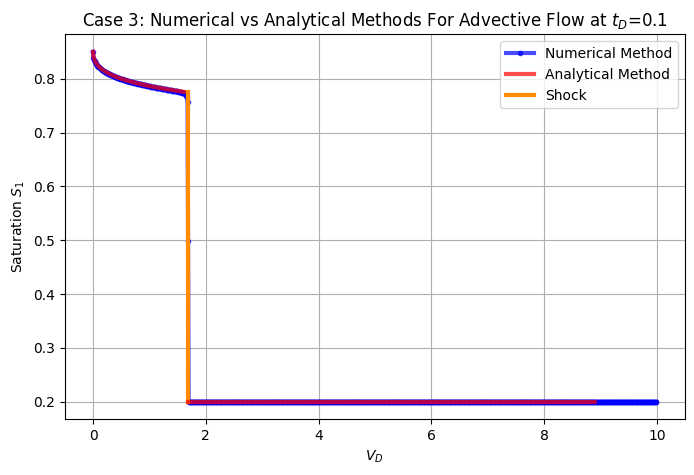

In [274]:
import numpy as np
import matplotlib.pyplot as plt

# ========== 第一段：数值方法 (Numerical Method) ==========

# --- 参数 (Case 3) ---
mu1   = 0.4
mu2   = 0.1
kr1_max = 0.4
kr2_max = 0.8
a     = 8.0
b     = 3.0
S1i   = 0.2
S2r   = 0.15

Lx    = 10.0
Nx    = 1001
dx    = Lx/(Nx - 1)

dt    = 0.001
nt    = 1000

def fractional_flow_num(S):
    eps = 1e-14
    Se = (S - S1i) / ((1 - S2r - S1i) + eps)
    Se = np.clip(Se, 0, 1)
    kr1 = kr1_max * (Se ** a)
    kr2 = kr2_max * ((1 - Se) ** b)
    kr1_safe = np.where(kr1 == 0, eps, kr1)
    f_val = 1.0 / (1.0 + (mu1 * kr2)/(mu2 * kr1_safe))
    return f_val

# 初始/边界条件
S_numerical = np.zeros(Nx)
S_numerical[0] = 1.0 - S2r  # = 0.85

# 时间推进(显式) + 截断处理
for n in range(nt):
    S_new = S_numerical.copy()
    for i in range(1, Nx):
        f_i   = fractional_flow_num(S_numerical[i])
        f_im1 = fractional_flow_num(S_numerical[i-1])
        S_new[i] = S_numerical[i] - (dt/dx)*(f_i - f_im1)
    # 截断: 不低于0.2, 不高于0.85
    S_new = np.clip(S_new, S1i, 1.0 - S2r)
    # 左边界继续保持0.85
    S_new[0] = 1.0 - S2r
    S_numerical = S_new

# 构造横坐标: v_d = ((i - 0.5)*dx)/(nt*dt)
v_d_array = np.zeros(Nx)
for i in range(Nx):
    v_d_array[i] = ((i - 0.5)*dx)/(nt*dt)

# ========== 第二段：解析方法 (Analytical Method) ==========

S_1i_ana = 0.2
S_2r_ana = 0.15
S_w_ana  = 1 - S_2r_ana
S_1_ana  = np.linspace(S_1i_ana, S_w_ana, 1000)

kr1_max_ana = 0.4
kr2_max_ana = 0.8
a_ana = 8
b_ana = 3
miu1_ana = 0.4
miu2_ana = 0.1

def f_ana(S_1):
    eps = 1e-14
    Se = (S_1 - S_1i_ana)/((1 - S_2r_ana - S_1i_ana) + eps)
    Se = np.clip(Se, 0, 1)
    kr1 = kr1_max_ana * (Se ** a_ana)
    kr2 = kr2_max_ana * ((1 - Se) ** b_ana)
    kr1_safe = np.where(kr1==0, eps, kr1)
    return 1.0 / (1.0 + (miu1_ana*kr2)/(miu2_ana*kr1_safe))

f_values_ana = f_ana(S_1_ana)
V_d_ana = np.gradient(f_values_ana, S_1_ana)

# 分段
mask1 = (V_d_ana <= 1.689) & (S_1_ana > 0.775)
V_d_seg1 = V_d_ana[mask1]
S_1_seg1 = S_1_ana[mask1]

V_d_seg2 = [1.689, 1.689]
S_1_seg2 = [0.775, 0.2]

mask3 = (V_d_ana >= 1.689)
V_d_seg3 = V_d_ana[mask3]
S_1_seg3 = np.full_like(V_d_seg3, 0.2)

# ========== 将二者画在同一张图里 ==========

plt.figure(figsize=(8,5))

# 1) 数值方法
plt.plot(v_d_array, S_numerical, 'b.-', label='Numerical Method',alpha=0.7,linewidth=3)

# 2) 解析方法(分段)
#   如果想让三段共享同一个图例label，只在第一条plot加 label 即可
plt.plot(V_d_seg1, S_1_seg1, 'r-', linewidth=3,label='Analytical Method',alpha=0.7)
plt.plot(V_d_seg2, S_1_seg2, '-',color='darkorange',linewidth=3, label='Shock')
plt.plot(V_d_seg3, S_1_seg3, 'r-',linewidth=3,alpha=0.7)

plt.xlabel('$V_D$')
plt.ylabel('Saturation $S_1$')
plt.title('Case 3: Numerical vs Analytical Methods For Advective Flow at $t_D$=0.1')
plt.grid(True)
plt.legend()
plt.show()


### Imbibition process

#### Case1

Converged c ~ 0.0000


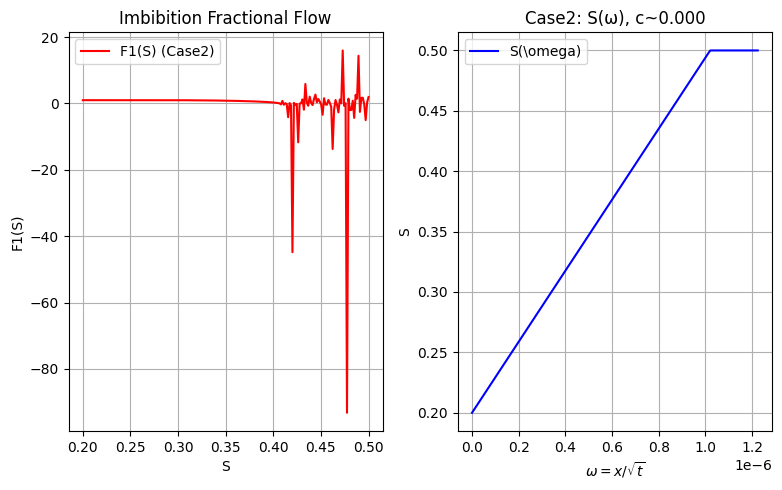

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ---------------------------
# 1. Case 2 参数 (Spont. Imbibition)
# ---------------------------
mu1   = 1.0      # mPa·s (Water)
mu2   = 0.1      # mPa·s (Hydrogen)
kr1_max = 0.15
kr2_max = 1.0
a     = 4.0
b     = 1.5
S1i   = 0.2      # irreducible water saturation
S2r   = 0.5      # residual hydrogen saturation

phi   = 0.25     # 孔隙度
K     = 1e-13    # 渗透率, m^2
pc_max= 100e3    # 100 kPa
c_exp = 0.3      # c exponent in Pc(S)
S_star= 0.5      # 可能题目给定 S^* 满足 Pc(S^*)=0

# 假设 c=... p_c^{max}=...,
# 例如: Pc(S)=p_c^{max} * [ (S^*)^-c - (S1i)^-c ] / [ (S^*)^-c -1 ] ...
# 这里演示1种简化写法:
def pc(S):
    """
    仅作演示:
    Pc(S) = pc_max * [ (S_star)^(-c_exp) - (S)^(-c_exp ) ] / [ (S_star)^(-c_exp) - (S1i)^(-c_exp) ]
    """
    eps=1e-14
    return pc_max * (
        (S_star+eps)**(-c_exp) - (S+eps)**(-c_exp)
    ) / (
        (S_star+eps)**(-c_exp) - (S1i+eps)**(-c_exp)
    )

def dpc_dS(S):
    """
    数值微分 dPc/dS
    Pc(S)=pc_max * ...
    这里对 (S+eps)^(-c_exp) 做导数:
       d/dS( S^(-c_exp) ) = -c_exp * S^(-c_exp -1)
    """
    eps=1e-14
    # 分子
    A = (S_star+eps)**(-c_exp) - (S+eps)**(-c_exp)
    B = (S_star+eps)**(-c_exp) - (S1i+eps)**(-c_exp)

    # d/dS of the fraction => 用商法则:
    #  Pc(S)=pc_max * [ A(S) / B ], A(S)=As - S^-c
    #  dA/dS = ...
    #  dB/dS=0 (S1i,S_star是常数)
    dA_dS = -(-c_exp)*(S+eps)**(-c_exp-1)
    # => dA_dS = c_exp * (S+eps)^(-c_exp-1)

    dPc_dS_val = (
        pc_max / (B+eps)
    ) * (
        dA_dS - A*(0) / (B+eps)   # B是常数 w.r.t S
    )
    return dPc_dS_val

def kr1_func(S):
    # 有效饱和度
    eps=1e-14
    Se = (S - S1i)/((1 - S2r - S1i)+eps)
    Se = np.clip(Se,0,1)
    return kr1_max*(Se**a)

def kr2_func(S):
    eps=1e-14
    Se = (S - S1i)/((1 - S2r - S1i)+eps)
    Se = np.clip(Se,0,1)
    return kr2_max*((1 - Se)**b)

def D_func(S):
    """
    D(S) = - ( kr1*kr2 / (mu1*mu2 ) ) * K * dPc/dS
    注意: 课上有时将负号合并进来, 视公式定义而定
    """
    return - ( kr1_func(S)*kr2_func(S)/(mu1*mu2) ) * K * dpc_dS(S)

# ---------------------------
# 2. 迭代求解 F1(S)
# ---------------------------

def compute_F1(c_value, max_iter=5, num_points=200):
    """
    给定 c(波速/相似参数), 在 [S1i, 1-S2r] 上离散 S,
    用迭代公式 F1^{k+1}(S)= 1 - phi/(2c^2)* int_{S1i to S}[ (beta-S1i)D(beta)/F1^k(beta) dBeta ]
    返回: S_array, F1_array (收敛后的)
    """
    Smin = S1i
    Smax = 1-S2r
    S_array = np.linspace(Smin, Smax, num_points)

    # 初始猜测, 比如线性: F1^{(0)}(S) ~ (S-S1i)/(Smax-S1i)
    F1_current = (S_array - Smin)/(Smax - Smin +1e-14)

    for it in range(max_iter):
        F1_new = np.zeros_like(F1_current)

        # 定义对 beta 积分的 integrand
        def integrand(beta, F1_interp):
            # F1_interp: 用于插值 F1^k(beta)
            f_val = np.interp(beta, S_array, F1_interp)
            D_val = D_func(beta)
            return (beta - S1i)*D_val/(f_val+1e-14)

        for j,Sj in enumerate(S_array):
            # 计算 int_{S1i}^{Sj} ...
            # 用scipy.integrate.quad 或简单梯形法均可
            val,err = quad(integrand, Smin, Sj, args=(F1_current,))
            F1_new[j] = 1 - (phi/(2*(c_value**2)))*val
        
        # 更新
        F1_current = 0.5*(F1_current + F1_new)  # 令更新更平滑些

    return S_array, F1_current

def compute_c2(F1_s, S_s):
    """
    c^2 = phi/2 * int_{S1i}^{S} [ (beta-S1i)D(beta)/F1_s(beta) ] dBeta
    这里 S 取到 S_s[-1], or wave front
    """
    from scipy.integrate import quad

    # wave front: 这时S_s[-1]即1-S2r
    S_front = S_s[-1]

    def integrand(beta):
        F_val = np.interp(beta, S_s, F1_s)
        return (beta-S1i)*D_func(beta)/(F_val+1e-14)

    val,_ = quad(integrand, S1i, S_front)
    return (phi/2.0)*val

# ---------------------------
# 3. 主程序: 给定 c, 迭代 F1, 检验 c^2
# ---------------------------
def find_F1_solution(num_iter=4):
    """
    过程示意:
    1) 先猜 c (可用 c=0.5 之类)
    2) 用 c^2 求 F1 => compute_F1(c)
    3) 再用算出的F1, compute_c2(...) 得到新的 c^2 => c => ...
    4) 循环
    """
    c_guess = 0.5  # 初值
    for iteration in range(num_iter):
        S_arr, F1_arr = compute_F1(c_guess, max_iter=5)
        c2 = compute_c2(F1_arr, S_arr)
        new_c = np.sqrt(c2)

        # 如果变化很小就可以收敛
        if abs(new_c - c_guess)<1e-3:
            c_guess = new_c
            break
        c_guess = new_c

    return S_arr, F1_arr, c_guess

# ---------------------------
# 4. 由 F1(S) 得到 S(\omega)
# ---------------------------
def S_of_omega(omega_array, S_arr, F1_arr, c_value):
    """
    在自发渗吸相似解里, 常有: omega = something(S)
    具体形式依课堂推导. 这里示例用:
      omega(S) = c * integral( ... ) ...
    或反向插值. 只演示“简单插值”方法: 令 S(omega)=S_arr(...).
    (在更严格推导中, 需进一步分析 F1 与 \omega 关系.)
    下面仅示例: wave front 在 S= S_arr[-1],
    - omega=0 => S= S1i
    - omega= c => S= wave front
    我们做个线性映射做示意(不代表精确公式).
    """
    Smin = S_arr[0]   # ~ S1i
    Smax = S_arr[-1]  # ~ wave front
    # 将 0~c_value 区间映射到 [Smin,Smax]
    # 仅作演示, 根据实际公式可改
    S_of_w = []
    for w in omega_array:
        if w<=0:
            S_of_w.append(Smin)
        elif w>= c_value:
            S_of_w.append(Smax)
        else:
            # 线性插值
            ratio= w/c_value
            val = Smin + ratio*(Smax-Smin)
            S_of_w.append(val)
    return np.array(S_of_w)


# ============ 主调用 ==============
if __name__=="__main__":
    # 1) 迭代得到 F1(S) 与 c
    S_sol, F1_sol, c_sol = find_F1_solution(num_iter=5)
    print(f"Converged c ~ {c_sol:.4f}")

    # 2) 构造一个 \omega 区间, 并简单生成 S(\omega)
    omega_vals = np.linspace(0, 1.2*c_sol, 200)
    S_vals = S_of_omega(omega_vals, S_sol, F1_sol, c_sol)

    # 3) 画图
    plt.figure(figsize=(8,5))
    # (a) 先画 F1(S)
    plt.subplot(1,2,1)
    plt.plot(S_sol, F1_sol, 'r-', label='F1(S) (Case2)')  
    plt.xlabel('S')
    plt.ylabel('F1(S)')
    plt.title('Imbibition Fractional Flow')
    plt.grid(True)
    plt.legend()

    # (b) 再画 S(\omega)
    plt.subplot(1,2,2)
    plt.plot(omega_vals, S_vals, 'b-', label='S(\omega)')
    plt.xlabel(r'$\omega = x/\sqrt{t}$')
    plt.ylabel('S')
    plt.title(f'Case2: S(ω), c~{c_sol:.3f}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


#### numerical

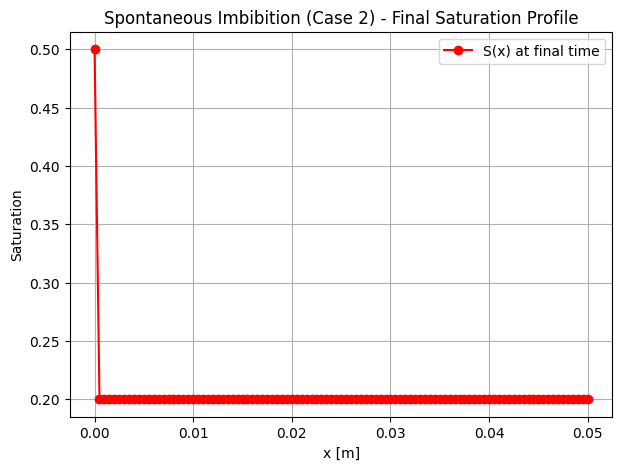

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# ================
# 1. 参数设置 (以Case 2为例)
# ================
phi        = 0.25           # 孔隙度
p_c_max    = 100000.0       # [Pa] (100 kPa), 注意单位！
c_exponent = 0.3
K          = 1e-13          # 渗透率 [m^2], 可能在D里若需要再用
mu1        = 1.0            # mPa.s
mu2        = 0.1            # mPa.s
kr1_max    = 0.15
kr2_max    = 1.0
a          = 4.0
b          = 1.5
S1i        = 0.2
S2r        = 0.5
S1_star    = 0.5            # 左端边界指定的饱和度(自发吸入时常取>初始值)

# 空间和时间离散
Lx     = 0.05     # 例如 5 cm
Nx     = 101
dx     = Lx/(Nx-1)
dt     = 0.001    # 时间步(需根据稳定性加以调试)
nt     = 3000     # 总步数

# ================
# 2. 定义辅助函数
# ================
def effective_saturation(S):
    """
    有效饱和度 Se = (S - S1i)/(1 - S2r - S1i)
    做安全限幅clip(0,1)，避免数值超出0~1
    """
    denom = max(1.0 - S2r - S1i, 1e-14)
    Se = (S - S1i)/denom
    return np.clip(Se, 0.0, 1.0)

def kr1(S):
    """
    kr1(Se) = kr1_max * Se^a
    """
    Se = effective_saturation(S)
    return kr1_max*(Se**a)

def kr2(S):
    """
    kr2(Se) = kr2_max * (1-Se)^b
    """
    Se = effective_saturation(S)
    return kr2_max*((1.0 - Se)**b)

def dPc_dS(S):
    """
    dPc/dS 由 Pc(S) 在题目中的模型：
        Pc(S) = p_c^max * [ (Se)^(-c) - 1 ]
    实际上要注意Se = 0时的发散，需加数值保护
    dPc/dSe = p_c^max * (-c)*(Se)^(-c-1)
    dPc/dS  = dPc/dSe * dSe/dS = 上式 * 1/(1-S2r-S1i)
    """
    Se = effective_saturation(S)
    eps = 1e-14
    denom = max(1.0 - S2r - S1i, eps)

    # dPc/dSe
    val = p_c_max * (-c_exponent)*(Se+eps)**(-c_exponent - 1.0)
    # 再乘上 dSe/dS
    return val/denom

def D(S):
    """
    D(S) = [ kr1(S)*kr2(S) / (kr1(S)/mu1 + kr2(S)/mu2 ) ] * [ -dPc/dS ]
    注意 -dPc/dS 若 Pc 随 S 增加而减小, 则此项>0, 使得D>0
    """
    kr1v = kr1(S)
    kr2v = kr2(S)
    denom = kr1v/mu1 + kr2v/mu2 + 1e-20
    # 负号直接放到这里: -dPc/dS
    return (kr1v*kr2v/denom) * (- dPc_dS(S))

# ================
# 3. 初始/边界条件
# ================
S = np.ones(Nx)*S1i     # x>0处 初始设为 S1i
S[0] = S1_star          # 左端边界 S(0)=S1*

# ================
# 4. 显式迭代
# ================
for n in range(nt):
    S_old = S.copy()

    # 通量 G_{i+1/2} = -D_{i+1/2} * (S[i+1]-S[i])/dx
    # 先算出每个格点上的D_i
    D_nodes = D(S_old)

    # 为了在i+1/2处取“平均”，简单做算术平均
    G = np.zeros(Nx-1)
    for i in range(Nx-1):
        D_face = 0.5*(D_nodes[i] + D_nodes[i+1])
        G[i]   = - D_face*(S_old[i+1] - S_old[i])/dx

    # 更新内部点： S[i]^{n+1} = S[i]^n + (dt/phi/dx)*( G[i-1] - G[i] )
    for i in range(1, Nx-1):
        S[i] = S_old[i] + (dt/(phi*dx))*( G[i-1] - G[i] )

    # 边界条件
    S[0] = S1_star           # 左端固定饱和度
    # 右端做no-flux：G_{Nx-1/2}=0 => S[Nx-1] 跟 S[Nx-2]相等即可
    S[-1] = S[-2]

# ================
# 5. 作图
# ================
x = np.linspace(0, Lx, Nx)

plt.figure(figsize=(7,5))
plt.plot(x, S, 'r-o', label='S(x) at final time')
plt.xlabel("x [m]")
plt.ylabel("Saturation")
plt.title("Spontaneous Imbibition (Case 2) - Final Saturation Profile")
plt.legend()
plt.grid(True)
plt.show()
